<a id='home'></a>
# Investigation of TMDb movie dataset

## Table of Contents
<ol>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#question">Questions imposed</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='Introduction'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.


<a href="#home">Home</a>

### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If this is help, don´t forget to upvote :) Greatings!

### Content
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

### Data Dictionary
PatientId - Identification of a patient AppointmentID - Identification of each appointment Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. DataAgendamento = The day someone called or registered the appointment, this is before appointment of course. Age = How old is the patient. Neighbourhood = Where the appointment takes place. Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia Hipertension = True or False Diabetes = True or False Alcoholism = True or False Handcap = True or False SMS_received = 1 or more messages sent to the patient. No-show = True or False.

### Inspiration
What if that possible to predict someone to no-show an appointment?

<a id='question'></a>
### Questions -
- Ratio of people missing appointments
- Absence of people based on gender
- Appointments based on hour of the day
- Appointments based on the days of the week
- Appointments based on month
- Most important factor which leads to their absence


<a href="#home">Home</a>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.




<a href="#home">Home</a>
### General Properties

In [426]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [427]:
# Load data
df = pd.read_csv('data/noshowappointments.csv', parse_dates=True)

In [428]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [430]:
df.shape

(110527, 14)

In [431]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## Todo - 
    - Modify data types : PatientId, AppointmentId
    - Format Date : ScheduledDay, AppointmentDay
    - Get dummies for No-show and Gender 
    - Reorder Columns

In [432]:
# Modify Data types

df['PatientId'] = df['PatientId'].astype('str')
df['AppointmentID'] = df['AppointmentID'].astype('str')
df['PatientId'] = df['PatientId'].str.split('.', expand=True)[0]

In [433]:
# Format Date

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format="%Y-%m-%dT%H:%M:%SZ")
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format="%Y-%m-%dT%H:%M:%SZ")

In [434]:
# Get dummies for No-show and Gender columns

df[['Present','Absent']] = pd.get_dummies(df['No-show'])
# df[['Female','Male']] = pd.get_dummies(df['Gender'])

In [435]:
# Drop extra columns

df.drop(['Absent','No-show'], inplace=True, axis=1)
# df.drop(['Gender','Female'], inplace=True, axis=1)

In [437]:
# No of Duplicated values

for _ in df.columns:
    print(_,sum(df[_].duplicated()))

PatientId 48228
AppointmentID 0
Gender 110525
ScheduledDay 6978
AppointmentDay 110500
Age 110423
Neighbourhood 110446
Scholarship 110525
Hipertension 110525
Diabetes 110525
Alcoholism 110525
Handcap 110522
SMS_received 110525
Present 110525


In [438]:
# No of Unique values

for _ in df.columns:
    print(_,len(df[_].unique()))
    print((df[_].unique()),'\n')

PatientId 62299
['29872499824296' '558997776694438' '4262962299951' ... '72633149253362'
 '996997666245785' '15576631729893'] 

AppointmentID 110527
['5642903' '5642503' '5642549' ... '5630692' '5630323' '5629448'] 

Gender 2
['F' 'M'] 

ScheduledDay 103549
['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ... '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000'] 

AppointmentDay 27
['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '

### Check if all the todo's are done or not

In [439]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Present           110527 non-null uint8
dtypes: datetime64[ns](2), int64(7), object(4), uint8(1)
memory usage: 11.1+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [454]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,Hour,Present
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,-10 days +06:51:17.952047,10.774542,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15 days 05:51:31.240428,3.216192,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59,6.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15 days +16:18:22.250000,8.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4 days +12:37:27,10.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 08:18:28,13.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20,21.000000,1.000000


In [442]:
# Removing the record with negative Age

df[df['Age'] < 0].index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [443]:
# Confirming that the data is removed

df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present


In [444]:
# Adding time difference between Appointment and Scheduled

df['WaitingTime'] = df['ScheduledDay'] - df['AppointmentDay']
dates = df['WaitingTime'].abs()

def dayCount(dates):
    return dates.days

dates = dates.map(dayCount)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present,WaitingTime
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18:38:08
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16:08:27
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,16:19:04
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17:29:31
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16:07:23


In [445]:
# Adding month of Appointment and Day of Appointment

df['Month'] = df['AppointmentDay'].dt.month_name()
df['Day'] = df['AppointmentDay'].dt.day_name()
df['Hour'] = df['ScheduledDay'].dt.hour

In [446]:
# Reorder Columns

column_order = df.columns.tolist()
column_order = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship',
                'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','Month','Day','Hour',
                'Present']
df = df[column_order]
df.shape

(110526, 18)

In [447]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,Month,Day,Hour,Present
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,18:38:08,April,Friday,18,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,16:08:27,April,Friday,16,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,16:19:04,April,Friday,16,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,17:29:31,April,Friday,17,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,16:07:23,April,Friday,16,1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.




<a href="#home">Home</a>
### Research Question 1 (Replace this header name!)

### Basic plots based on the available columns

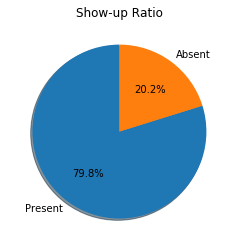

In [401]:
temp = df['Present'].value_counts().to_list()
x_marker = ['Present', 'Absent']
plt.pie(temp, labels = x_marker, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Show-up Ratio');

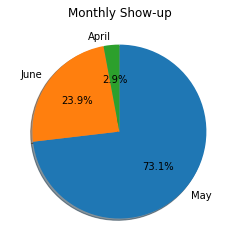

In [402]:
temp = df['Month'].value_counts().to_list()
x_marker = df['Month'].value_counts().index.tolist()
plt.pie(temp, labels = x_marker, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)
plt.title('Monthly Show-up');

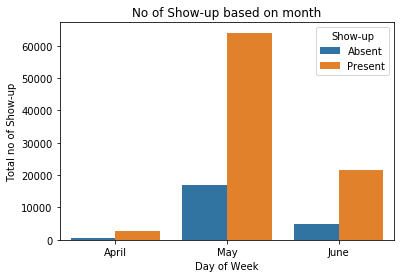

In [403]:
sb.countplot(data=df, x='Month', hue='Present');
plt.title('No of Show-up based on month')
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Day of Week')
plt.ylabel('Total no of Show-up');

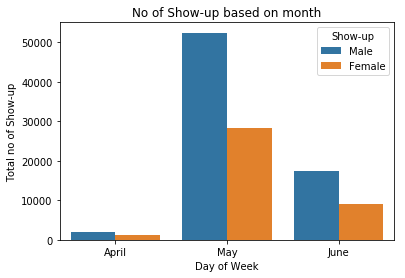

In [404]:
sb.countplot(data=df, x='Month', hue='Gender');
plt.title('No of Show-up based on month')
plt.legend(['Male','Female'], title='Show-up');
plt.xlabel('Day of Week')
plt.ylabel('Total no of Show-up');

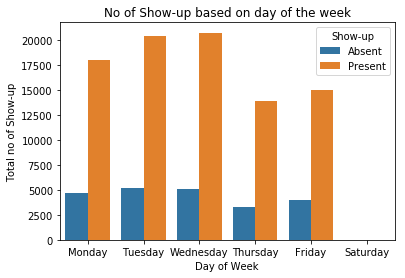

In [405]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='Day', hue='Present', order=x_marker);
plt.title('No of Show-up based on day of the week')
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Day of Week')
plt.ylabel('Total no of Show-up');

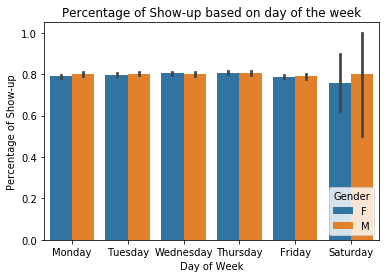

In [406]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.barplot(data=df, x='Day', y='Present', hue='Gender', order=x_marker);
plt.title('Percentage of Show-up based on day of the week');
plt.legend(loc='lower right', title='Gender');
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Show-up');

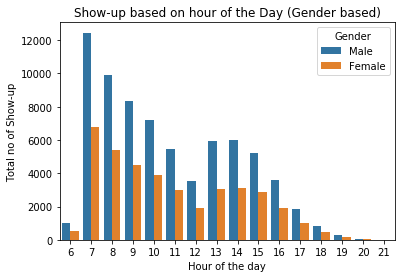

In [407]:
df.groupby('Hour').count()
# x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='Hour', hue='Gender');
plt.legend(['Male','Female'], title='Gender');
plt.xlabel('Hour of the day')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on hour of the Day (Gender based)');

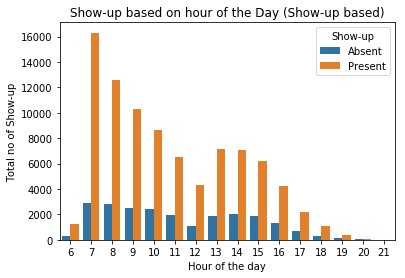

In [408]:
sb.countplot(data=df, x='Hour', hue='Present');
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Hour of the day')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on hour of the Day (Show-up based)');

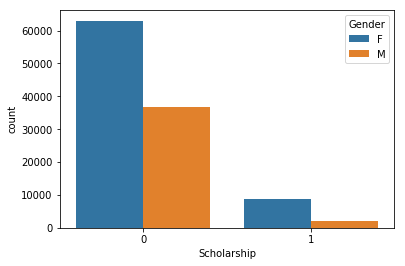

In [409]:
sb.countplot(data=df, x='Scholarship', hue='Gender');

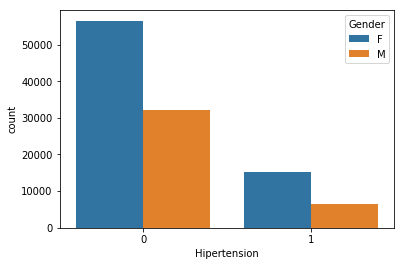

In [410]:
sb.countplot(data=df, x='Hipertension', hue='Gender');

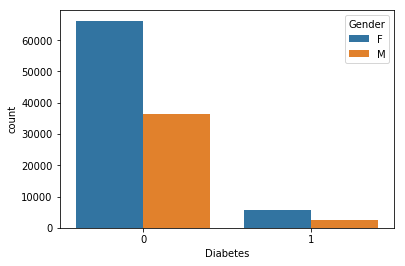

In [411]:
sb.countplot(data=df, x='Diabetes', hue='Gender');

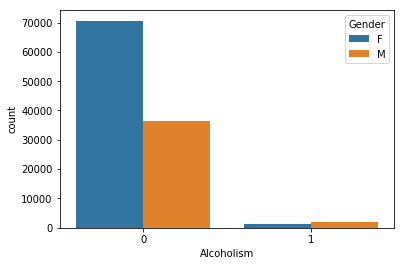

In [412]:
sb.countplot(data=df, x='Alcoholism', hue='Gender');

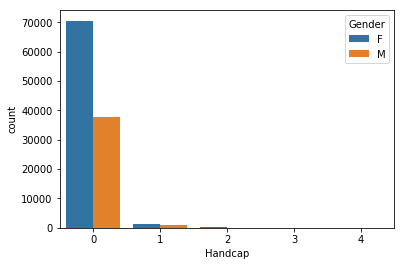

In [413]:
sb.countplot(data=df, x='Handcap', hue='Gender');

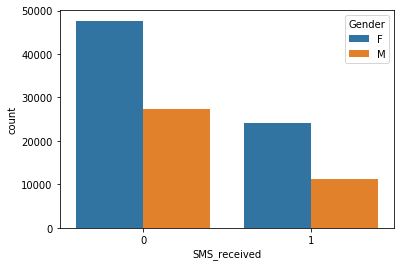

In [414]:
sb.countplot(data=df, x='SMS_received', hue='Gender');

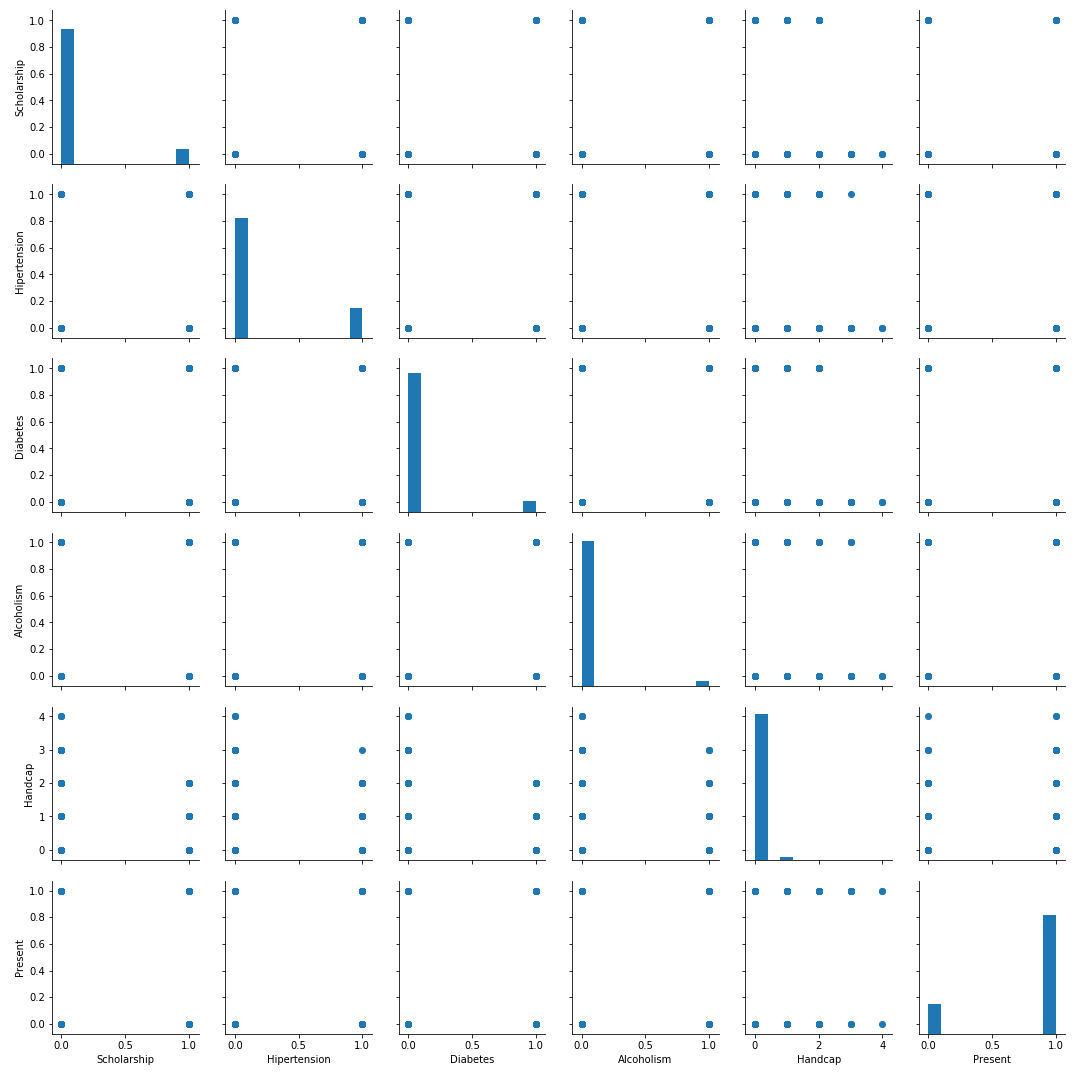

In [423]:
g = sb.PairGrid(data = df, vars = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Present'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

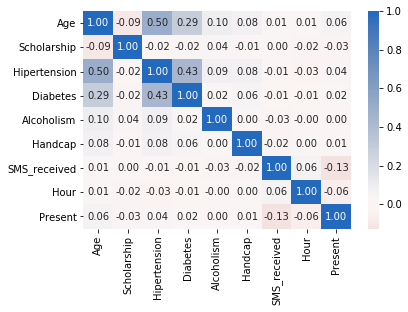

In [451]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

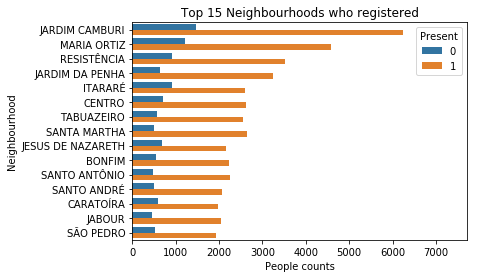

In [417]:
neighbourhood_counts = df['Neighbourhood'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['Neighbourhood'].value_counts().max())
# base_color = sb.color_palette()[3]
sb.countplot(data = df, y = 'Neighbourhood', hue='Present', order = neighbourhood_order[:15])
plt.xlabel('People counts')
plt.title('Top 15 Neighbourhoods who registered');

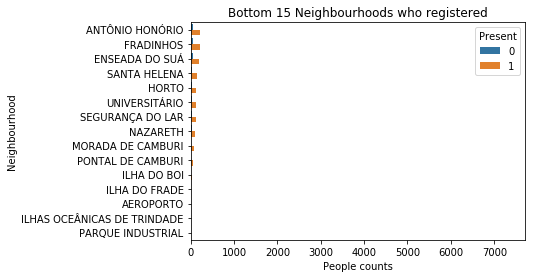

In [418]:
sb.countplot(data = df, y = 'Neighbourhood', hue='Present', order = neighbourhood_order[-15:])
plt.xlim(0,df['Neighbourhood'].value_counts().max())
plt.xlabel('People counts')
plt.title('Bottom 15 Neighbourhoods who registered');
# df['Neighbourhood'].value_counts().max()

### Research Question 2  (Replace this header name!)

#### Dependency of show-up as based on the ages of the people

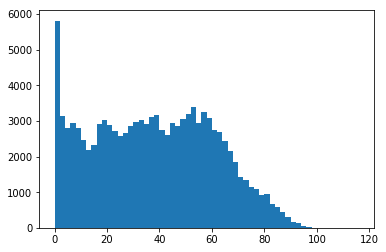

In [419]:
bin_size = np.arange(df['Age'].min(), df['Age'].max()+2, 2)
plt.hist(df['Age'], bins=bin_size);

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!



<a href="#home">Home</a>

### Age
Mostly infants less than 2 years of age attend the appointment

### Waiting Time


### Gender
More no of males show-up for the appointments

### Hipertension and Diabetes
These are the two most important factors which influenced the show-up ratio

### Month
Most appointments were made in May

### Day
Wednesday has most sshow-ups and Saturday has the least

### Hour
The graph is bimodal with 1st peak between 7 and 9 and 2nd peak between 13 and 15. These two time periods have the most show-ups

### Neighbourhood
The top 3 neighbourhood having most show-up are - JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA

The top 3 neighbourhood having least show-up are - AEROPORTO, ILHAS OCEÂNICAS DE TRINDADE, PARQUE INDUSTRIAL'



<a href="#home">Home</a>